In [183]:
# Base
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random 

# Hypothesis Testing
import statsmodels.api as sm
from scipy.stats import shapiro, anderson
import scipy.stats as stats
from statsmodels.stats import proportion

from scipy.stats import mannwhitneyu, wilcoxon, kruskal
import warnings
warnings.filterwarnings("ignore")

### Домашнее задание

#### 1. Если мы рассчитали 95% доверительный интервал для среднего значения, то какие из следующих утверждений являются верными?

Выберите несколько вариантов и попытайтесь объяснить свой выбор:

1) Если многократно повторять эксперимент, то 95 % выборочных средних значений будут принадлежать рассчитанному нами доверительному интервалу.

2) Мы можем быть на 95% уверены, что среднее значение в генеральной совокупности принадлежит рассчитанному доверительному интервалу.

3) Если многократно повторять эксперимент, для каждой выборки рассчитывать свой доверительный интервал, то в 95 % случаев истинное среднее будет находиться внутри доверительного интервала.

4) Среднее значение в генеральной совокупности точно превышает нижнюю границу 95% доверительного интервала.

5) Среднее значение в генеральной совокупности точно принадлежит рассчитанному доверительному интервалу.

#### 2. Если мы увеличиваем объем выборки в два раза (при условии, что показатель стандартного отклонения остается неизменным), то 95% доверительный интервал

Выберите один вариант из списка

1) стал более узким
2) возможны оба варианта
3) стал более широким

#### 3. В центре 95% доверительного интервала, рассчитанного по выборочным значениям, находится:

Выберите один вариант из списка

1) Значение стандартной ошибки среднего
2) Выборочное среднее значение
3) Среднее значение генеральной совокупности

#### 4. Часто на практике нулевая гипотеза отклоняется, и различия считаются статистически достоверными, если p < 0,05. Однако часто в статистике используется более жесткий критерий достоверности различий, например, при условии, что p < 0,01. Значение p-уровня значимости, которое выбирается, в качестве порога обозначается буквой α (альфа). Например, если исследователь решил, что α = 0,05, то и нулевая гипотеза будет отклоняться при условии, что p < 0,05. 

#### Если в определенной ситуации весьма рискованно отклонить нулевую гипотезу, когда она на самом деле верна, то лучше использовать показатель α равный 

Выберите один вариант из списка

1) 0,1
2) 0,001
3) 0,05
4) 0,5

#### 5. Данные некоторого исследования сообщают нам, что средний рост детей в 14 лет составляет 166 сантиметров. Однако это лишь выборочная оценка, и исследователи рассчитали 95% доверительный интервал, который составил [160, 172]. Укажите верные утверждения:

Выберите несколько вариантов и попытайтесь объяснить свой выбор:

1) У нас достаточно оснований отклонить нулевую гипотезу, что среднее в генеральной совокупности равняется 173
2) Вероятность того, что истинное среднее значение больше 172, составляет 0,01
3) У нас достаточно оснований отклонить нулевую гипотезу, что среднее в генеральной совокупности равняется 158.
4) Доверительный интервал не может иметь такие границы, т. к. выборочное стандартное отклонение равняется 10, следовательно доверительный интервал должен быть значительно шире.

#### 6. Предположим, нулевой гипотезой вашего исследования являлось предположение, что конверсия в генеральной совокупности равняется 0.4. Вы получили p = 0,12 и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что конверсия в генеральной совокупности действиетльно равна 0.4. Как можно оценить результаты?


Какой вариант корректный по вашему мнению и почему?
1) Вы не совершали ни ошибку первого рода, ни ошибку второго рода.
2) Вы совершили ошибку первого рода
3) Вы совершили ошибку второго рода

### Ответы

1) 2 и 3 
2) 1 уменьшим где то на корень из двух
3) 2 выборочное среднее
4) чем меньше тем лучше ответ - 2 (чем меньше альфа тем меньше вероятность отклонить H0)
5) 1 и 3, сигма = (172-160)/4=3 158 и 173 лежат за пределом alpha  =0.05
6) 1 недостаточный размер выборки следствие ошибки 1го рода

### Анализ данных AB теста

* version Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a a gate at level 40
* sum_gamerounds The number of game rounds played by the player during the first 14 days after install
* retention_1 Did the player come back and play 1 day after installing?
* retention_7 Did the player come back and play 7 days after installing?

In [6]:
df = pd.read_csv("cookie_cats.csv")

In [219]:
df.shape

(90189, 5)

In [8]:
df['version'].replace({'gate_30':'A', 'gate_40':'B'}, inplace=True)
df['retention_1'].replace({False:0, True:1}, inplace=True)
df['retention_7'].replace({False:0, True:1}, inplace=True)
df.head(3)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,0,0
1,337,A,38,1,0
2,377,B,165,1,0


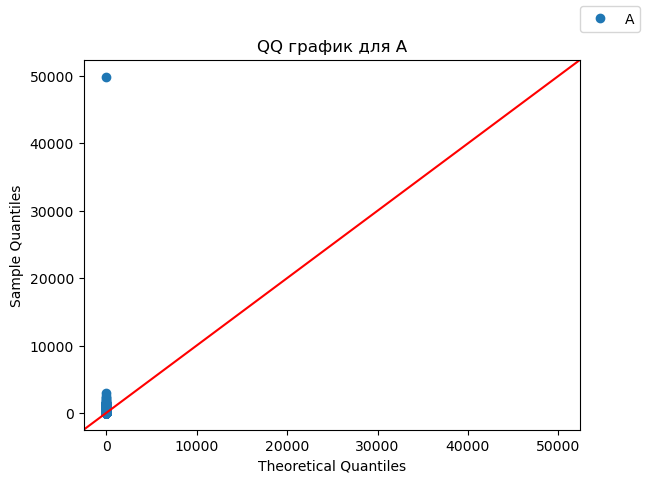

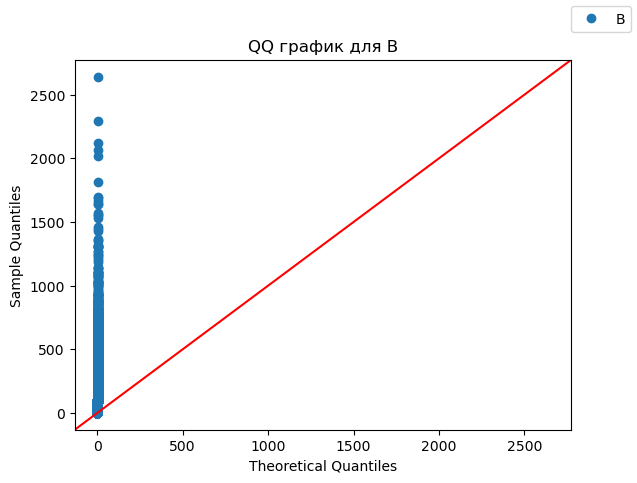

In [200]:
fig = sm.qqplot(df['sum_gamerounds'].loc[df['version']=='A'], line='45')
plt.title('QQ график для A')
fig.legend('A', fontsize=10)
fig = sm.qqplot(df['sum_gamerounds'].loc[df['version']=='B'], line='45')
plt.title('QQ график для B')
fig.legend('B', fontsize=10)
plt.show()

#### Как видно из графиков выше данные явно не имеют нормальное распределение, подтвердим ниже тестом шапиро и андерсона. Так же для выборки A видно крайне выдающиесчя значение признака sum_gamerounds больше 40k


## Тест Шапиро и Андерсана для ЦП групп А и B

In [93]:
print('Shapiro test for sum_gamerounds A')
statistic, p_value = shapiro(df['sum_gamerounds'].loc[df['version']=='A'])
a = 0.05
if a < p_value:
    print('It is normal distribution (Gaussian)')
elif a > p_value:
    print('It is not normal distribution (Gaussian)')
elif a == p_value:
    print('It is edge case')
    
print(f'Statistic: {statistic}; p_value: {p_value}')

Shapiro test for sum_gamerounds A
It is not normal distribution (Gaussian)
Statistic: 0.08805108070373535; p_value: 0.0


In [98]:
print('Anderson test for sum_gamerounds A')
result = anderson(df['sum_gamerounds'].loc[df['version']=='A'])
print('Statistic: %.3f' % result.statistic)
sl, cv = result.significance_level[2], result.critical_values[2]
if result.statistic < result.critical_values[2]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
else:
    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Anderson test for sum_gamerounds A
Statistic: 10493.396
5.000: 0.787, data does not look normal (reject H0)


In [94]:
print('Shapiro test for sum_gamerounds B')
statistic, p_value = shapiro(df['sum_gamerounds'].loc[df['version']=='B'])
a = 0.05
if a < p_value:
    print('It is normal distribution (Gaussian)')
elif a > p_value:
    print('It is not normal distribution (Gaussian)')
elif a == p_value:
    print('It is edge case')
    
print(f'Statistic: {statistic}; p_value: {p_value}')

Shapiro test for sum_gamerounds B
It is not normal distribution (Gaussian)
Statistic: 0.48256635665893555; p_value: 0.0


In [99]:
print('Anderson test for sum_gamerounds B')
result = anderson(df['sum_gamerounds'].loc[df['version']=='B'])
print('Statistic: %.3f' % result.statistic)
sl, cv = result.significance_level[2], result.critical_values[2]
if result.statistic < result.critical_values[2]:
	print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
else:
	print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Anderson test for sum_gamerounds B
Statistic: 6742.854
5.000: 0.787, data does not look normal (reject H0)


## Общая статистика по группам A и B

In [9]:
df[df['version']=='A'].describe()

,userid,sum_gamerounds,retention_1,retention_7
count,4.470000e+04,44700.000000,44700.000000,44700.000000
mean,4.987564e+06,52.456264,0.448188,0.190201
std,2.881026e+06,256.716423,0.497314,0.392464
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.505469e+06,5.000000,0.000000,0.000000
50%,4.983631e+06,17.000000,0.000000,0.000000
75%,7.481497e+06,50.000000,1.000000,0.000000
max,9.999710e+06,49854.000000,1.000000,1.000000


In [15]:
df[df['version']=='B'].describe()

,userid,sum_gamerounds,retention_1,retention_7
count,4.548900e+04,45489.000000,45489.000000,45489.000000
mean,5.009073e+06,51.298776,0.442283,0.182000
std,2.885496e+06,103.294416,0.496663,0.385849
min,3.770000e+02,0.000000,0.000000,0.000000
25%,2.517171e+06,5.000000,0.000000,0.000000
50%,5.007329e+06,16.000000,0.000000,0.000000
75%,7.510762e+06,52.000000,1.000000,0.000000
max,9.999861e+06,2640.000000,1.000000,1.000000


In [47]:
df.groupby('version')['sum_gamerounds'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
A,44700.0,52.456264,256.716423,0.0,5.0,17.0,50.0,49854.0
B,45489.0,51.298776,103.294416,0.0,5.0,16.0,52.0,2640.0


### Mannwhitneyu 

U-критерий Манна-Уитни - это непараметрический критерий статистической значимости для определения того, были ли взяты две независимые выборки из популяции с одинаковым распределением.

Два образца объединяются и ранжируются вместе. Стратегия состоит в том, чтобы определить, являются ли значения из двух выборок случайно смешанными в порядке ранжирования или они объединены в противоположные концы при объединении. Случайный порядок ранга будет означать, что две выборки не отличаются, в то время как кластер значений одной выборки будет указывать на разницу между ними.

#### Двухстороний

In [189]:
mw_stats = mannwhitneyu(x=df[df['version'] == 'A']['sum_gamerounds'].values,
                                                  y=df[df['version'] == 'B']['sum_gamerounds'].values)
alpha = 0.05
if mw_stats[1] < alpha:
    print("We may reject the null hypothesis!")
else:
    print("We have failed to reject the null hypothesis")
mw_stats

We have failed to reject the null hypothesis


MannwhitneyuResult(statistic=1024331250.5, pvalue=0.05020880772044255)

### С отсечением подозрительных значений sum_gamerounds в выборке A

In [203]:
mw_stats = mannwhitneyu(x=df[(df['version'] == 'A') & (df['sum_gamerounds'] < 40000)]['sum_gamerounds'].values,
                                                  y=df[df['version'] == 'B']['sum_gamerounds'].values)
alpha = 0.05
if mw_stats[1] < alpha:
    print("We may reject the null hypothesis!")
else:
    print("We have failed to reject the null hypothesis")
mw_stats

We have failed to reject the null hypothesis


MannwhitneyuResult(statistic=1024285761.5, pvalue=0.05089155279145376)

### Kruskal 
является непараметрической версией одностороннего дисперсионного анализа или ANOVA. Этот тест можно использовать для определения того, имеют ли более двух независимых выборок различное распределение. Его можно рассматривать как обобщение U-критерия Манна-Уитни.

In [184]:
stat, p = kruskal(df[df['version'] == 'A']['sum_gamerounds'].values, df[df['version'] == 'B']['sum_gamerounds'], )
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=3.834, p=0.050
Same distributions (fail to reject H0)


In [205]:
stat, p = kruskal(df[(df['version'] == 'A') & (df['sum_gamerounds'] < 40000)]['sum_gamerounds'].values, df[df['version'] == 'B']['sum_gamerounds'], )
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=3.812, p=0.051
Same distributions (fail to reject H0)


### Перестановочный тест 


In [139]:
def perm_fun(x, nA, nB):
    n = nA + nB
    indx_b = set(random.sample(range(n),nB))
    indx_a = set(range(n))-indx_b
    return x.loc[indx_b].mean()-x.loc[indx_a].mean()

In [216]:
mean_b = df[df['version'] == 'B']['sum_gamerounds'].mean()
mean_a = df[df['version'] == 'A']['sum_gamerounds'].mean()
nA = df[df['version']=='A'].shape[0]
nB = df[df['version']=='B'].shape[0]
perm = [perm_fun(df['sum_gamerounds'], nA, nB) for _ in range(10000)]

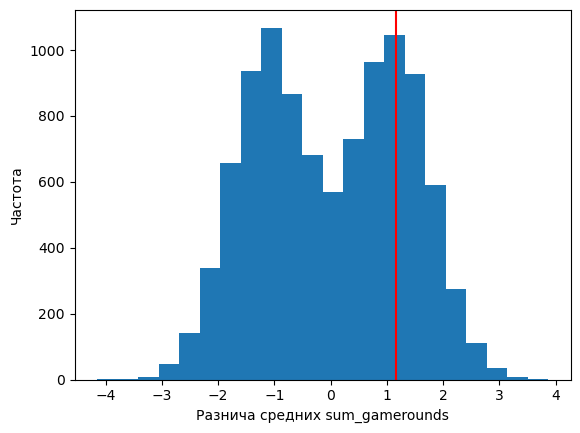

In [217]:
fig, ax = plt.subplots()
ax.hist(perm, bins=22)
ax.axvline(x=mean_a-mean_b, color='red')
ax.set_xlabel('Разнича средних sum_gamerounds')
ax.set_ylabel('Частота');

In [218]:
p_val = np.mean(perm > (mean_b-mean_a))
p_val

0.765

Несмотря на крайне пограничное значение p_value всех непараметричиских тестов выборка A ничем не отличается от выборки B 
при alpha = 0.05. Еще большее значение p_value показал перестановочный тест. 
### Вывод - A=B при alpha =0.05
